#Week 2 Exercise 2.2 Author: Rex Gayas Course & Section: DSC320-T301 Math for Data Science (2243-1) Date: 10 December 2023

Index(['weight', 'hwy_mpg'], dtype='object')


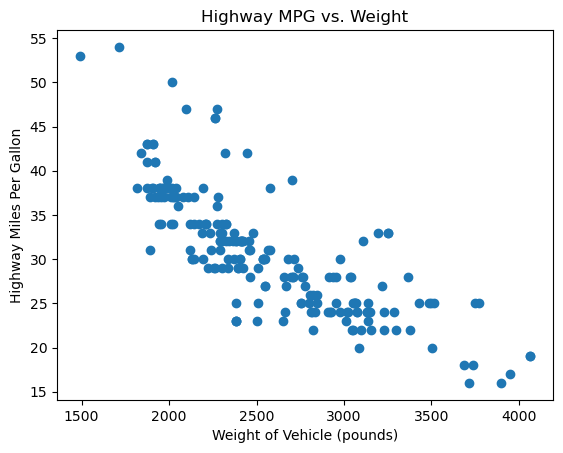

In [7]:
#Solution to Question 1.
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('D:/ALPHA/Dynamic Folder/Bellevue/Winter 2023/Math for Data Science/Week 2/week2data/week2data/car_data.csv')

# Print the column names
print(data.columns)

# Create a scatterplot
plt.scatter(data['weight'], data['hwy_mpg'])
plt.xlabel('Weight of Vehicle (pounds)')
plt.ylabel('Highway Miles Per Gallon')
plt.title('Highway MPG vs. Weight')
plt.show()



#Solution to Question 2
There appears to be a negative correlation, meaning that as the weight of a vehicle increases, the highway MPG tends to decrease.The points are more tightly clustered at lower weights, indicating that lighter vehicles have less variation in highway MPG and heavier vehicles show a wider range of highway MPG values.

#Solution to Question 3
The scatterplot shows a negative correlation between vehicle weight and highway MPG. As the weight increases, the highway MPG tends to decrease. Expectedly, the slope should be negative because there is an inverse relationship between the two variables.

Using the linear equation of the form y = mx + b where y is the highway MPG, x is the weight of the vehicle, m is the slope, and b is the y-intercept:

A negative m (slope) value indicates that as the weight (x) increases, the highway MPG (y) decreases.

#Solution to Question 4 
A slope of -0.05 (or m = -0.05) is best interpreted as:

For every additional pound of vehicle weight, the highway miles per gallon would decrease by 0.05. It quantifies the negative relationship between the two variables, indicating that heavier vehicles tend to be less fuel-efficient on the highway.
Additionally, -0.05 is the rate of change; a small slope in absolute value suggests that weight has a relatively decent impact on highway MPG compared to larger absolute values.

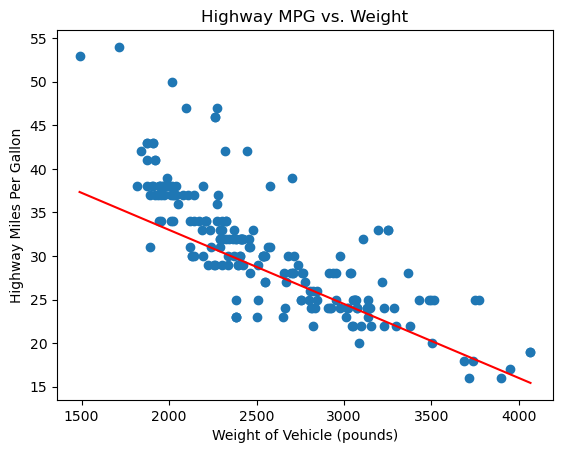

In [17]:
#Solution to Question 5
#Using the slope of -0.05 from question 4 resulted in a slope that seemed too steep.
#Adjusted slope (m) and y-intercept (b) from visual estimation
m = -0.0085 # adjusted slope
b = 50     # adjusted y-intercept

# Generate x values from the minimum and maximum weight values
x_values = np.array([data['weight'].min(), data['weight'].max()])

# Calculate the corresponding y values from the line equation
y_values = m * x_values + b

# Plot the scatterplot again
plt.scatter(data['weight'], data['hwy_mpg'])
plt.xlabel('Weight of Vehicle (pounds)')
plt.ylabel('Highway Miles Per Gallon')
plt.title('Highway MPG vs. Weight')

# Plot the adjusted manually estimated best-fit line
plt.plot(x_values, y_values, color='red')

# Show the plot with the adjusted best-fit line
plt.show()



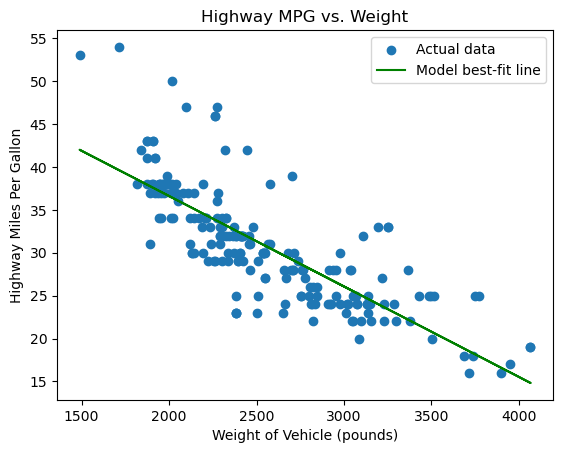

Model slope (m): -0.010547157168719585
Model intercept (b): 57.70517422574474


In [18]:
#Solution to Question 6
from sklearn.linear_model import LinearRegression

# Reshape the data to fit the model
X = data['weight'].values.reshape(-1, 1)  # Features (independent variable)
y = data['hwy_mpg'].values  # Target (dependent variable)

# Initialize the model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the slope (coefficient) and intercept from the model
slope = model.coef_[0]
intercept = model.intercept_

# Generate y values based on the model's slope and intercept
predicted_y_values = model.predict(X)

# Plot the scatterplot
plt.scatter(data['weight'], data['hwy_mpg'], label='Actual data')
plt.xlabel('Weight of Vehicle (pounds)')
plt.ylabel('Highway Miles Per Gallon')
plt.title('Highway MPG vs. Weight')

# Plot the model's best-fit line
plt.plot(data['weight'], predicted_y_values, color='green', label='Model best-fit line')

# Add a legend to differentiate data points and the Model best-fit line
plt.legend()

# Show the plot with the best-fit line
plt.show()

# Print the slope and intercept
print(f"Model slope (m): {slope}")
print(f"Model intercept (b): {intercept}")


In [19]:
#Solution to Question 7
from sklearn.metrics import mean_squared_error
from math import sqrt

# Manually predicted values using the manual slope and intercept
manual_predicted_y_values = -0.0085 * data['weight'] + 50

# RMSE for the manual best-fit line
manual_rmse = sqrt(mean_squared_error(data['hwy_mpg'], manual_predicted_y_values))

# RMSE for the model's best-fit line
model_rmse = sqrt(mean_squared_error(data['hwy_mpg'], predicted_y_values))

# Print the RMSE values
print(f"Manual best-fit line RMSE: {manual_rmse}")
print(f"Model best-fit line RMSE: {model_rmse}")


Manual best-fit line RMSE: 4.942583946139322
Model best-fit line RMSE: 4.144895442072009


#Addendum to Question 7
We have learned that the RMSE (Root Mean Square Error) measures the average magnitude of the errors between the predicted values from a model and the actual values. A lower RMSE value indicates a better fit of the model to the data.
The model's best-fit line RMSE (4.1449) is lower than the manual best-fit line RMSE (4.9426). Hence, the model's predictions are, on average, closer to the actual data points than the predictions from the manually estimated line.

In [20]:
#Solution to Question 8
# Weight for which we want to predict highway MPG
weight_to_predict = 3200

# Predict highway MPG using the model's best-fit line
predicted_highway_mpg = model.predict([[weight_to_predict]])

# Print the predicted highway MPG
print(f"Predicted highway MPG for a vehicle weighing {weight_to_predict} pounds: {predicted_highway_mpg[0]}")


Predicted highway MPG for a vehicle weighing 3200 pounds: 23.95427128584207


Visually, we can see that a vehicle that is 3200 pounds would have a highway MPG that falls between 23 to 25.